## Goodreads project
- date: 21/07/2023
- author: Souheil
- subject: First attempt in selecting features and training a classification model (logistic regression)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("books_analysis_output.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11046 non-null  int64  
 1   title               11046 non-null  object 
 2   authors             11046 non-null  object 
 3   average_rating      11046 non-null  float64
 4   isbn                11046 non-null  object 
 5   isbn13              11046 non-null  int64  
 6   language_code       11046 non-null  object 
 7   num_pages           11046 non-null  int64  
 8   ratings_count       11046 non-null  int64  
 9   text_reviews_count  11046 non-null  int64  
 10  publication_date    11046 non-null  object 
 11  publisher           11046 non-null  object 
 12  publication_year    11046 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


### Features

features to be considered in the model: 
- language_code
- num_pages
- ratings_count
- text_reviews_count
- publication_year

target attribute:
- average_rating

### 1. language_code

<Axes: title={'center': 'distribution of language code'}, xlabel='language_code', ylabel='occurrences'>

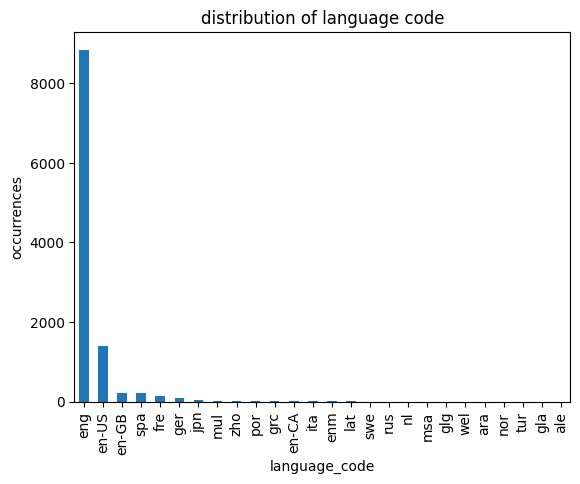

In [4]:
dataset["language_code"].value_counts().plot.bar(title="distribution of language code", ylabel="occurrences")

- The values of the attribute `language_code` are imbalanced !
- the majority of books is written in english language

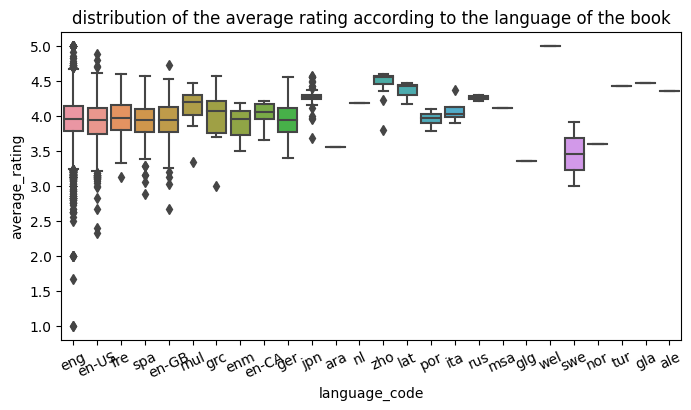

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dataset, x="language_code", y="average_rating")
plt.xticks(rotation=25)
plt.title("distribution of the average rating according to the language of the book")
plt.show()

#### Observations
- rare observations for some values of the attribute language_code: the dataset contains only few examples of books written in languages different from english
- one way to tackle this imbalanced data is to group the data by `english` and `world` for the rest of the languages 

In [6]:
def language_category(lan_code: str):
    """convert language code in english or world"""
    if lan_code in ("eng", "en-US", "en-GB", "en-CA"):
        return "english"
    else:
        return "world"

In [7]:
dataset["language"] = dataset["language_code"].apply(language_category)

<Axes: title={'center': 'distribution of language code'}, xlabel='language', ylabel='occurrences'>

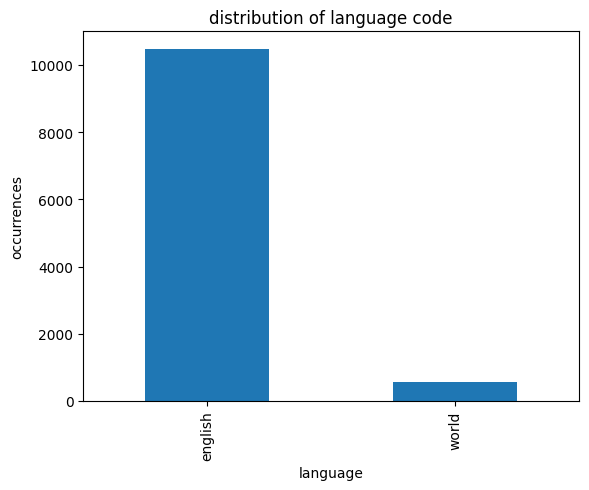

In [8]:
dataset["language"].value_counts().plot.bar(title="distribution of language code", ylabel="occurrences")

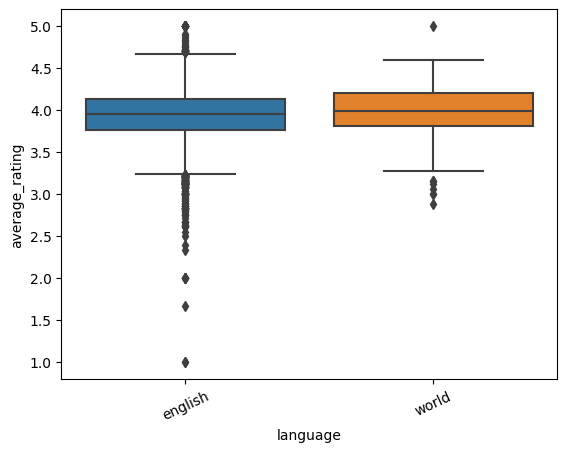

In [9]:
# plt.figure(figsize=(10, 4))
sns.boxplot(data=dataset, x="language", y="average_rating")
plt.xticks(rotation=25)
plt.show()

#### observations
- we see that there is an important difference in the count of the values of the language attribute
- on the other hand, we can see that the distributions of both values are quite close (except some low values in the english label).
- the question is: should we keep this attribute or drop from the list of features to be used in the model ? is the language of the book an indicator of its rating ? 

### 2. Number of pages

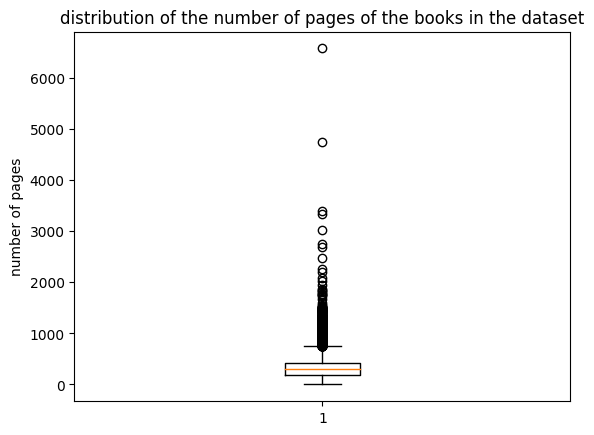

In [10]:
plt.figure()
plt.boxplot(dataset["num_pages"])
plt.title("distribution of the number of pages of the books in the dataset")
plt.ylabel("number of pages")
plt.show()

is there books with 0 number of pages ?

In [11]:
dataset[dataset["num_pages"]==0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,language
304,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers,2005-01-01,english
846,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media,2003-01-01,english
1052,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio,2006-01-01,english
1055,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio,2003-01-01,english
1220,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio,2006-01-01,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media,2005-01-01,english
10120,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing,1995-01-01,english
10547,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio,1999-01-01,english
10846,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books,1981-01-01,english


#### Observations
- we can see that many books with 0 number of pages are juste audio versions of a particular book. The average rating was duplicated from the one of the original version.
- those anomalies in the dataset represent 75 lines
- should we keep those lines ?? 

in the sake of simplicity, we decide to drop those lines

In [12]:
dataset = dataset[~(dataset["num_pages"]==0)]

### 3. ratings_count 

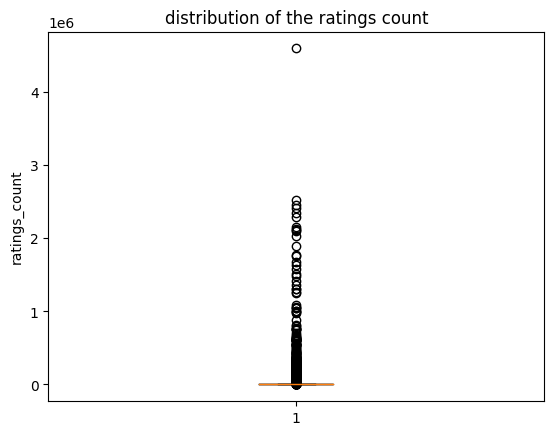

In [13]:
plt.figure()
plt.boxplot(dataset["ratings_count"])
plt.title("distribution of the ratings count")
plt.ylabel("ratings_count")
plt.show()

Text(0.5, 1.0, 'average rating according to the ratings count')

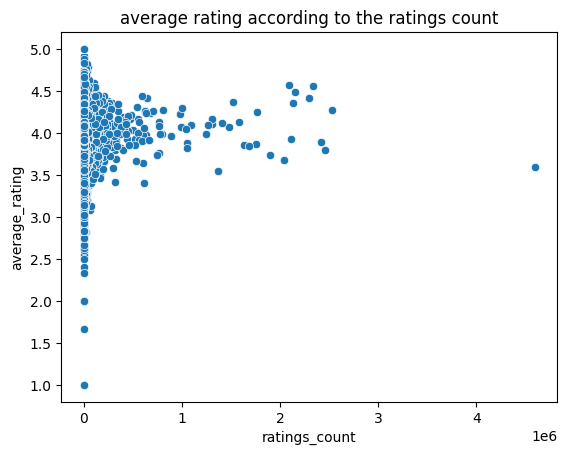

In [14]:
plt.figure()
sns.scatterplot(data=dataset, x="ratings_count", y="average_rating")
plt.title("average rating according to the ratings count")

#### observations
- we observe some outliers (values higher than 1e6)
- should we keep them or remove them ?

In [15]:
dataset_slice = dataset.loc[dataset["ratings_count"] < 0.5e6]

Text(0.5, 1.0, 'average rating according to the ratings count')

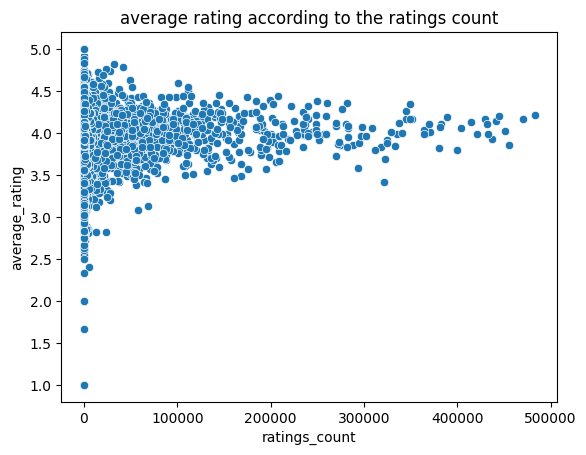

In [16]:
plt.figure()
sns.scatterplot(data=dataset_slice, x="ratings_count", y="average_rating")
plt.title("average rating according to the ratings count")

- we decide to remove the outliers

### 4. text reviews count

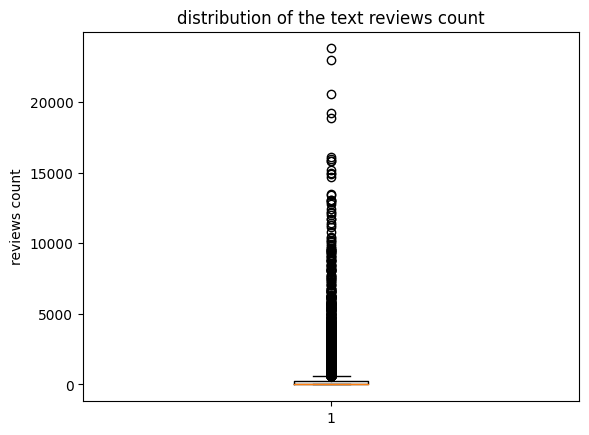

In [17]:
plt.figure()
plt.boxplot(dataset_slice["text_reviews_count"])
plt.title("distribution of the text reviews count")
plt.ylabel("reviews count")
plt.show()

Text(0.5, 1.0, 'average rating according to the reviews count')

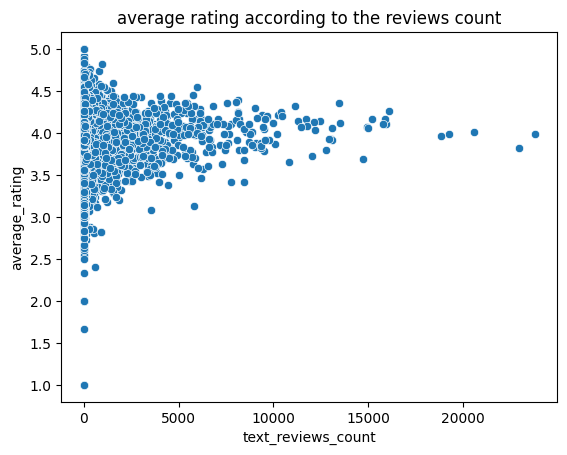

In [18]:
plt.figure()
sns.scatterplot(data=dataset_slice, x="text_reviews_count", y="average_rating")
plt.title("average rating according to the reviews count")

- we can slice some outliers

In [19]:
dataset_sliced = dataset_slice.loc[dataset_slice["text_reviews_count"] < 1500]

Text(0.5, 1.0, 'average rating according to the reviews count')

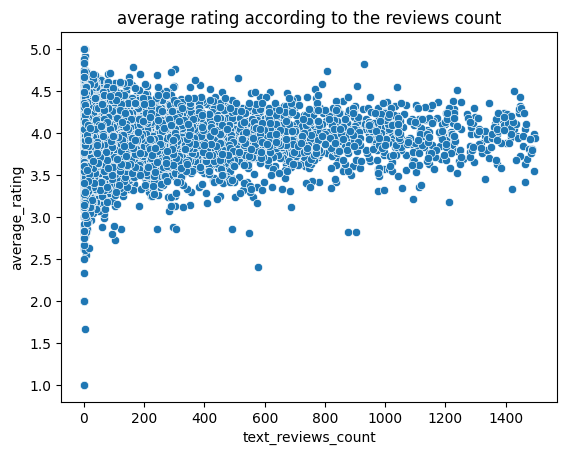

In [20]:
plt.figure()
sns.scatterplot(data=dataset_sliced, x="text_reviews_count", y="average_rating")
plt.title("average rating according to the reviews count")

### 5. publication year

In [21]:
dataset_sliced["publication_year"] = pd.to_datetime(dataset_sliced["publication_year"])

C:\Users\souhe\AppData\Local\Temp\ipykernel_45764\2719238042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sliced["publication_year"] = pd.to_datetime(dataset_sliced["publication_year"])


<Axes: xlabel='publication_year'>

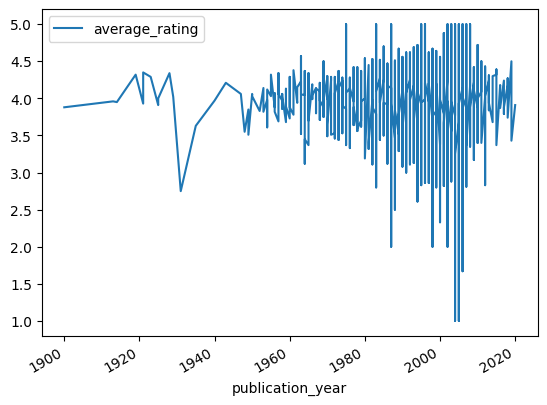

In [22]:
dataset_sliced.plot(x="publication_year", y="average_rating")

- we cannot say that the average rating is influenced by the year of publication

### conclusion on features
we decide to keep the following features
- number of pages
- rating counts
- text review counts

In [23]:
dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_year', 'language'],
      dtype='object')

In [24]:
dataset_model = dataset_sliced[["num_pages", "ratings_count", "text_reviews_count", "average_rating"]]

# Classification model : logistic regression model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### definition of classes: data binning
- (1-2): class 1
- )2-3): class 2
- )3,4): class 3
- )4,5): class 4

In [25]:
df_features = dataset_model[["num_pages", "ratings_count", "text_reviews_count"]]
df_target = dataset_model[["average_rating"]]

In [26]:
df_target

,average_rating
2,4.42
4,4.78
5,3.74
6,4.73
7,4.38
...,...
11041,4.06
11042,4.08
11043,3.96
11044,3.72


In [44]:
bins = [0, 2, 3, 4, 5]
labels = [1, 2, 3, 4]
target_y = pd.cut(df_target["average_rating"], bins, labels=labels)

In [45]:
target_y

2        4
4        4
5        3
6        4
7        4
        ..
11041    4
11042    4
11043    3
11044    3
11045    3
Name: average_rating, Length: 10175, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

Text(0.5, 1.0, 'counts of each class')

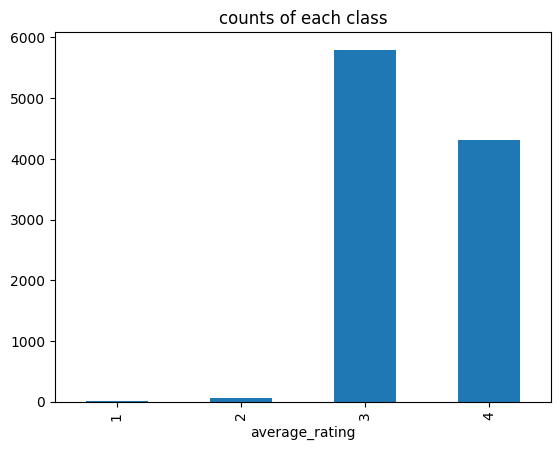

In [46]:
plt.figure()
pd.value_counts(target_y).sort_index().plot(kind="bar")
plt.title("counts of each class")

#### Observations
- we can clearly see that the classes are imbalanced
- we can use https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

### split in train and test

think about shuffling / stratified split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features.values, target_y, test_size=.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [50]:
y_predicted = clf.predict(X_test)

### metrics

In [53]:
(y_predicted == y_test).sum()/len(y_test)

0.6014742014742015

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

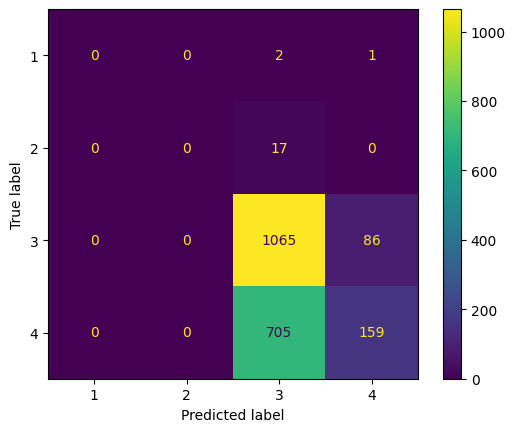

In [58]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

clearly, we can see here that the classes 1 and 2 that have few values, have wrong classifications. This result is normal but it is necessary to balance the data in order to make a classification
